<a href="https://colab.research.google.com/github/jyj1206/SoloDeepLearning/blob/main/Chapter1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 생성
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

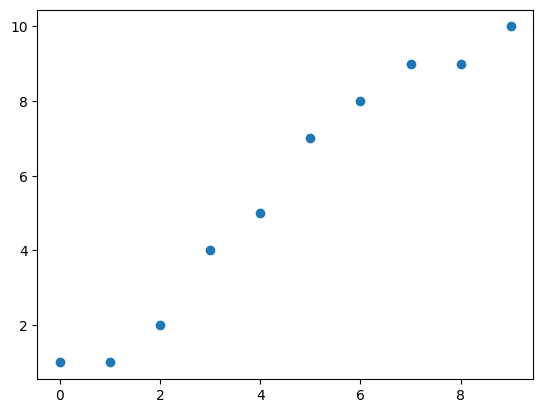

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [ ]:
# Hypothetis 정의
class H():
  def __init__(self, w):
    self.w = w

  def forward(self, x):
    return self.w * x

# cost 함수 정의
def cost(pred_y,  true_y):
  error = 0
  for i in range(len(X)):
    error +=  (pred_y[i] - Y[i]) ** 2
  return error / len(X)

w = 4
h = H(w)
pred_y = [h.forward(x) for x in X]
print(f"w = {w}, cost = {cost(pred_y, Y)}")

w = 4, cost = 222.2


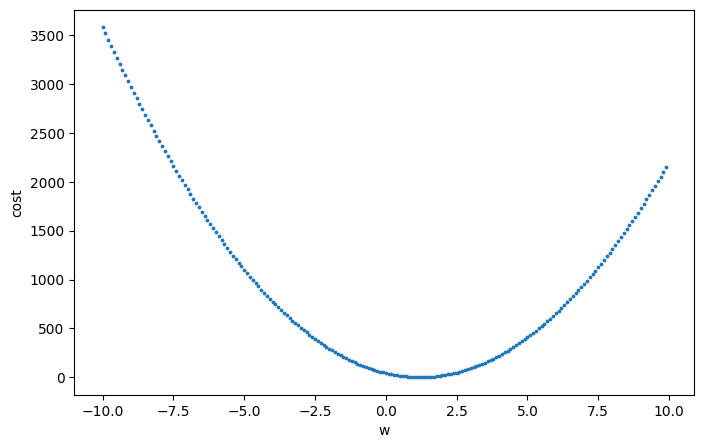

In [ ]:
# w에 따른 cost의 변화
list_w = []
list_c = []

for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  pred_y = [h.forward(x) for x in X]
  c = cost(pred_y, Y)
  list_w.append(w)
  list_c.append(c)

# 시각화
plt.figure(figsize=(8, 5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)
plt.show()

In [ ]:
# 그래디언트 구하기

# 수치해석학적인 방법
def cal_grad(w, cost):
  eps = 0.00001
  h1 = H(w)
  pred_y1 = [h1.forward(x) for x in X]
  cost1 = cost(pred_y1, Y)

  h2 = H(w + eps)
  pred_y2 = [h2.forward(x) for x in X]
  cost2 = cost(pred_y2, Y)

  dcost =  cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1 + cost2) / 2

# 편미분을 이용한 방법
def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  pred_y = [h.forward(x) for x in X]
  for i in range(len(X)):
    grad += 2 * (pred_y[i] - Y[i]) * X[i]
  grad /= len(X)
  c = cost(pred_y, Y)
  return grad, c

수치해석학을 이용한 방법 : w = 1.2105213157891912, cost = 0.4368421059756581)
편미분을 이용한 방법 : w = 1.2105263157894737, cost = 0.43684210526315803)


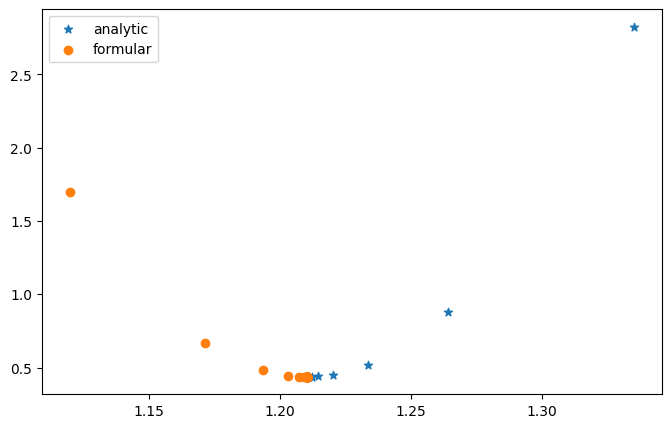

In [ ]:
# 두 가지 방법 비교
# 초기 가중치와 학습률
w1 = 1.5
w2 = 1

lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

# 학습 진행
for i in range(100):
  grad1, mean_cost1 = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad1
  w2 -= lr * grad2

  list_w1.append(w1)
  list_c1.append(mean_cost1)
  list_w2.append(w2)
  list_c2.append(mean_cost2)

# 학습 100번 이후에 결과
print(f"수치해석학을 이용한 방법 : w = {w1}, cost = {mean_cost1})")
print(f"편미분을 이용한 방법 : w = {w2}, cost = {mean_cost2})")

# w 값에 따른 cost 시각화
plt.figure(figsize=(8, 5))
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formular')
plt.legend()
plt.show()

> 두 가지 방법 모두에서 결국 비슷한 값으로 수렴됨